<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-04-20 04:18:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  49.8MB/s    in 3.1s    

2025-04-20 04:18:48 (49.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


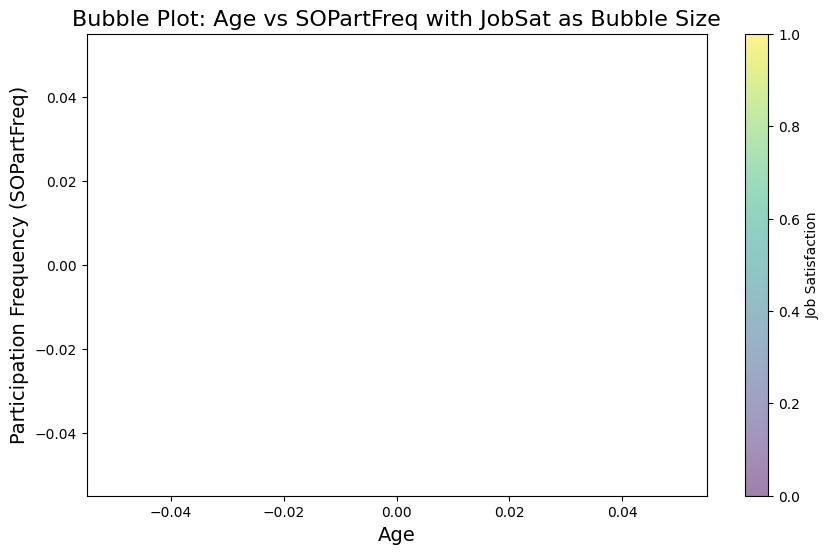

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Convert 'JobSat' column to numeric, coercing errors to NaN
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Handle missing values in JobSat (fill with the mean, avoid inplace=True)
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mean())

# Ensure other columns are numeric as well (for safety)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['SOPartFreq'] = pd.to_numeric(df['SOPartFreq'], errors='coerce')

# Drop rows where Age or SOPartFreq might be NaN after coercion
df = df.dropna(subset=['Age', 'SOPartFreq'])

# Plot the bubble chart
plt.figure(figsize=(10, 6))

# Bubble plot with age on the x-axis, SOPartFreq on the y-axis, and JobSat as the bubble size
plt.scatter(
    df['Age'],               # X-axis: Age
    df['SOPartFreq'],        # Y-axis: SOPartFreq
    s=df['JobSat'] * 100,    # Size of bubbles: JobSat (scaled by 100 for visibility)
    alpha=0.5,              # Set transparency for bubbles
    c=df['JobSat'],         # Color of the bubbles: JobSat
    cmap='viridis',         # Color map for the bubbles
    edgecolors='w',         # White edge color for bubbles
)

# Adding labels and title
plt.title('Bubble Plot: Age vs SOPartFreq with JobSat as Bubble Size', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Participation Frequency (SOPartFreq)', fontsize=14)
plt.colorbar(label='Job Satisfaction')  # Color bar for JobSat

# Show the plot
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


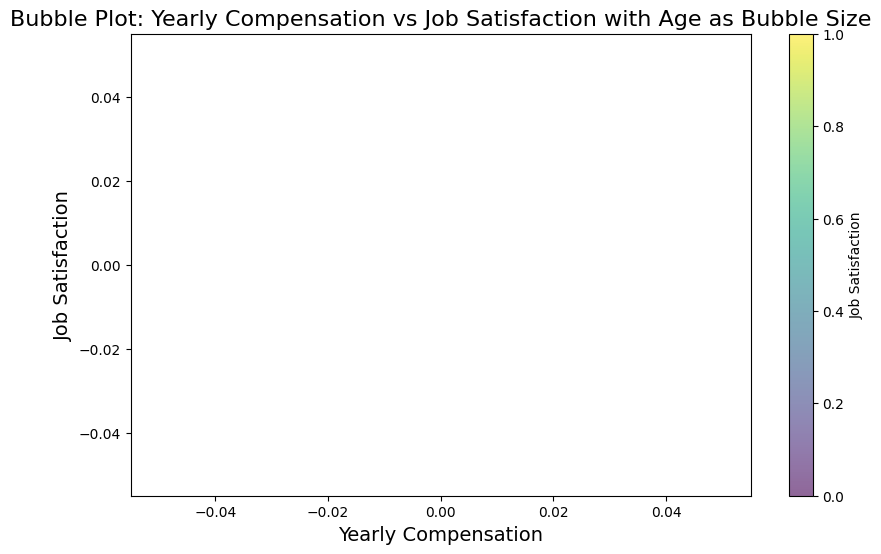

In [6]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Convert columns to numeric, handling any errors by coercing them to NaN
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Handle missing values (fill missing job satisfaction with the mean, for example)
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mean())

# Remove rows with missing compensation or job satisfaction
df = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'])

# Plot the bubble chart
plt.figure(figsize=(10, 6))

# Bubble plot with compensation on the x-axis, job satisfaction on the y-axis, and age as bubble size
plt.scatter(
    df['ConvertedCompYearly'],     # X-axis: Yearly Compensation
    df['JobSat'],                  # Y-axis: Job Satisfaction
    s=df['Age'] * 10,              # Size of bubbles: Age (scaled by 10 for better visibility)
    alpha=0.6,                    # Set transparency for bubbles
    c=df['JobSat'],               # Color of the bubbles: JobSat
    cmap='viridis',               # Color map for the bubbles
    edgecolors='w',               # White edge color for bubbles
)

# Adding labels and title
plt.title('Bubble Plot: Yearly Compensation vs Job Satisfaction with Age as Bubble Size', fontsize=16)
plt.xlabel('Yearly Compensation', fontsize=14)
plt.ylabel('Job Satisfaction', fontsize=14)
plt.colorbar(label='Job Satisfaction')  # Color bar for JobSat

# Show the plot
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



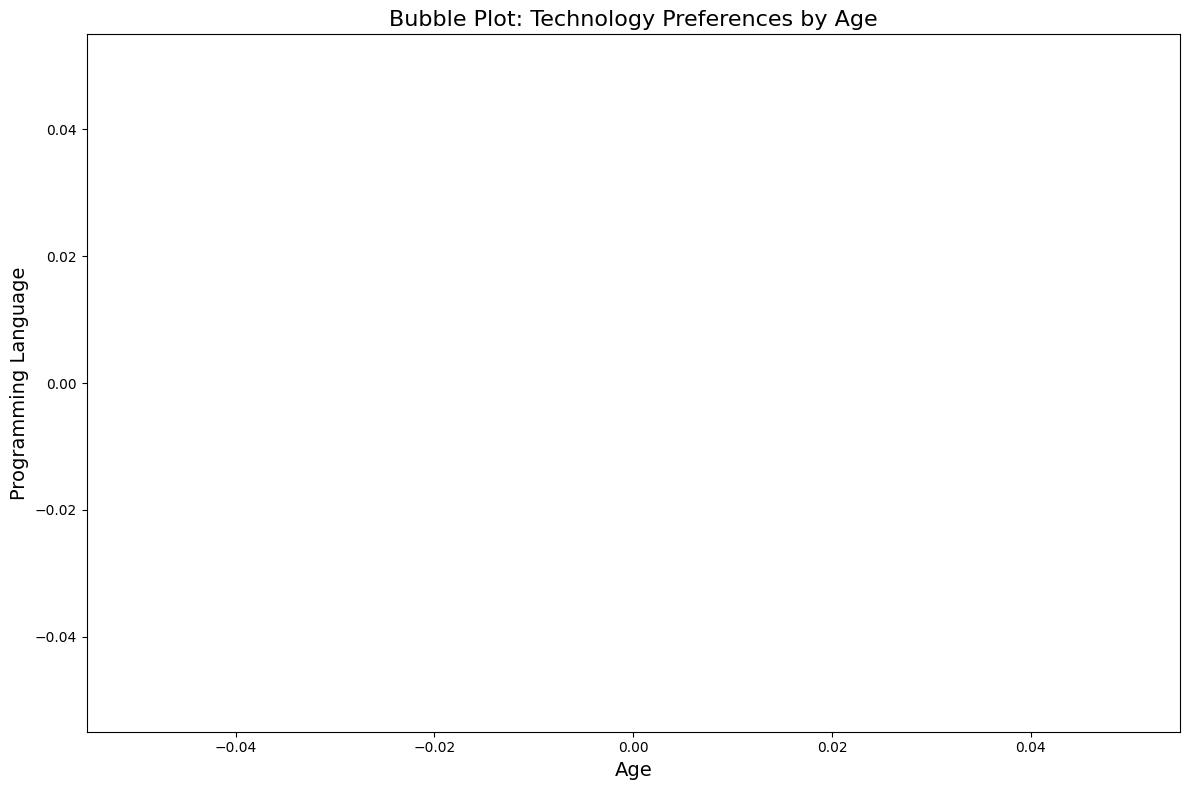

In [7]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Clean up and ensure numeric columns are correct
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age', 'LanguageHaveWorkedWith'])

# Split the 'LanguageHaveWorkedWith' into individual languages
languages = df['LanguageHaveWorkedWith'].str.split(',').explode().str.strip()

# Add the corresponding 'Age' value for each language
ages = df['Age'].repeat(df['LanguageHaveWorkedWith'].str.split(',').str.len()).reset_index(drop=True)

# Combine into a new DataFrame
language_data = pd.DataFrame({
    'Language': languages,
    'Age': ages
})

# Count the frequency of each language and group by age
language_freq = language_data.groupby(['Language', 'Age']).size().reset_index(name='Frequency')

# Plot the bubble chart
plt.figure(figsize=(12, 8))

# Create the scatter plot (bubble plot)
plt.scatter(
    language_freq['Age'],               # X-axis: Age
    language_freq['Language'],          # Y-axis: Programming Language
    s=language_freq['Frequency'] * 10,  # Bubble size: Frequency (scaled for visibility)
    alpha=0.7,                         # Set transparency for bubbles
    edgecolors='w',                    # White edge color for bubbles
)

# Adding labels and title
plt.title('Bubble Plot: Technology Preferences by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Programming Language', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [ ]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Clean up and ensure numeric columns are correct
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df = df.dropna(subset=['JobSat', 'DatabaseWantToWorkWith'])

# Split the 'DatabaseWantToWorkWith' into individual databases
databases = df['DatabaseWantToWorkWith'].str.split(',').explode().str.strip()

# Add the corresponding 'JobSat' value for each database
job_sats = df['JobSat'].repeat(df['DatabaseWantToWorkWith'].str.split(',').str.len()).reset_index(drop=True)

# Combine into a new DataFrame
database_data = pd.DataFrame({
    'Database': databases,
    'JobSat': job_sats
})

# Count the frequency of each database and group by job satisfaction
database_freq = database_data.groupby(['Database', 'JobSat']).size().reset_index(name='Frequency')

# Plot the bubble chart
plt.figure(figsize=(12, 8))

# Create the scatter plot (bubble plot)
plt.scatter(
    database_freq['JobSat'],             # X-axis: Job Satisfaction
    database_freq['Database'],           # Y-axis: Database
    s=database_freq['Frequency'] * 50,  # Bubble size: Frequency (scaled for visibility)
    alpha=0.7,                          # Set transparency for bubbles
    edgecolors='w',                     # White edge color for bubbles
)

# Adding labels and title
plt.title('Bubble Plot: Preferred Databases vs Job Satisfaction', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=14)
plt.ylabel('Database', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [ ]:
##Write your code here

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [ ]:
##Write your code here

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [ ]:
##Write your code here

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
##Write your code here

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
